In [1]:
from time import time
import random
import math

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from seaborn import cm

from deap import base, creator, tools, algorithms

# Se desea encontrar el mínimo de la función de Rastrigin

$$A*n+\sum_{i=1}^{n}[x_{i}^2 - A * cos(2\pi x_{i})]$$

Con:
- A=10
- $$x_{i} ∈ [-5.12, 5.12]$$

# Función

In [2]:
def rastrigin(X, A=10):
    return A * len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

def rastrigin_to_plot(*X, A=10):
    return A * len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

## Grafica

In [3]:
def plot():
    # Vectores de todo el dominio
    x = np.linspace(-5.12, 5.12, 1000)
    y = np.linspace(-5.12, 5.12, 1000)
    x, y = np.meshgrid(x, y)

    z = rastrigin_to_plot(x, y)
    print(z.shape)

    fig = plt.figure(figsize=(8,15))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap=cm.icefire)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")

(1000, 1000)
<ipython-input-3-fc98610fa3e9>:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


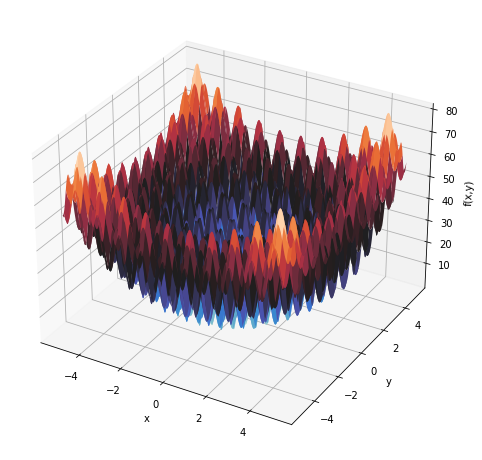

In [4]:
plot()

# Solución

In [5]:
def register_initial_components(n_gens, n_individuals):
    for _class in ["FitnessMin", "Individual"]: 
        if _class in dir(creator):
            delattr(creator, _class)

    # Creación de objetos para la definición del problema e indiviuo
    creator.create("FitnessMin", base.Fitness, weights=(-1.0, ))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    # Generación de genes
    toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

    # Generación de individuos
    toolbox.register(
        "individual",
        tools.initRepeat,
        creator.Individual,
        toolbox.attr_uniform,
        n_gens
    )

    # Generación de población
    toolbox.register(
        "population",
        tools.initRepeat,
        list,
        toolbox.individual,
        n_individuals
    )

    return toolbox

In [6]:
def funcion_objetivo(X):
    for i in range(len(X)):
        if X[i] < -5.12 or X[i] > 5.12:
            return -1,
    return rastrigin(X),


In [7]:
def register_genetic_operators(toolbox):
    toolbox.register("evaluate", funcion_objetivo)
    toolbox.register("mate", tools.cxUniform, indpb=0.1)
    # toolbox.register("mate", tools.cxOnePoint)
    # toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.1)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)
    return toolbox

In [8]:
def plot_evolution(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")

    fig, ax1 = plt.subplots(figsize=(8,8))
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_avg, "--k")
    ax1.fill_between(gen , fit_mins , fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_title("Minimizar función de Rastrigin mediante algoritmos geneticos")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    # ax1.set_ylim([-1, 240])
    # ax1.set_xlim([0, 51])
    ax1.legend (["Min", "Max", "Avg"], loc="upper right")
    plt.grid(True)

In [9]:
def simulate(toolbox, CXPB = 0.5, MUTPB = 0.2, NGEN = 20, verbose=False):
    random.seed(1617)
    pop = toolbox.population()
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(
        pop,
        toolbox,
        cxpb=CXPB,
        mutpb=MUTPB,
        ngen=NGEN,
        stats=stats,
        halloffame=hof,
        verbose=verbose
    )
    return hof, logbook
    

In [10]:
def run(n_gens, n_individuals, CXPB=0.5, MUTPB=0.2, NGEN=20, verbose=False, **kwargs):
    toolbox = register_initial_components(n_gens, n_individuals)
    toolbox = register_genetic_operators(toolbox)

    return simulate(toolbox, CXPB, MUTPB, NGEN, verbose=verbose)


In [106]:
simulations_cases = (
    {"id": 1, "n_gens": 2, "n_individuals": 2, "NGEN": 10,"CXPB": 0.2, "MUTPB":0.55}, # Ganador
)

In [107]:
simulations_result = {}
for case in simulations_cases:
    t0 = time()
    best, log = run(**case, verbose=True)
    print("="*100)
    simulations_result[case["id"]] = {"best": best, "log": log, "time": round(time() - t0,2), "args": case}


gen	nevals	avg    	std    	min   	max    
0  	2     	37.7452	2.93413	34.811	40.6793
1  	1     	34.811 	0      	34.811	34.811 
2  	1     	22.4021	12.4089	9.99323	34.811 
3  	2     	4.99662	4.99662	0      	9.99323
4  	0     	0      	0      	0      	0      
5  	2     	0.5    	0.5    	0      	1      
6  	2     	0      	0      	0      	0      
7  	2     	1      	1      	0      	2      
8  	1     	0      	0      	0      	0      
9  	1     	0      	0      	0      	0      
10 	1     	0      	0      	0      	0      


In [108]:
def show_results(results):
    message = "ID\tIndividuos\t Máximo\tN° Evaluaciones\tTiempo\n"
    for id in results:
        n_evaluations = results[id]['args']['n_individuals'] * results[id]["args"]["NGEN"]
        best = round(results[id]['best'][0].fitness.values[0], 4)
        message += f"{id}\t{results[id]['args']['n_individuals']}\t\t {best}\t\t{n_evaluations}\t{results[id]['time']}s\n"
    print(message)


In [109]:
show_results(simulations_result)

ID	Individuos	 Máximo	N° Evaluaciones	Tiempo
1	2		 0.0		20	0.01s



In [110]:
simulations_result[1]["best"][0]

[0.0, 0.0]

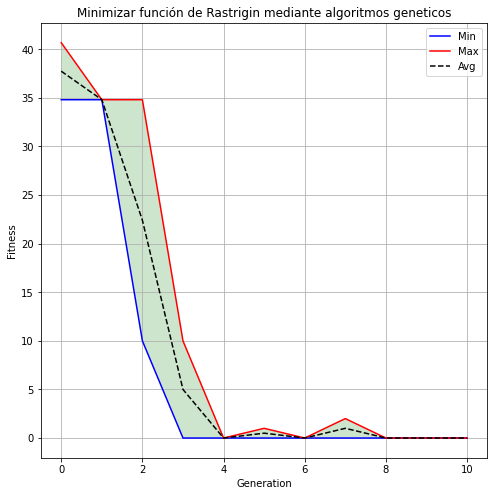

In [113]:
plot_evolution(simulations_result[1]["log"])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e519ef70-0417-4f93-b18c-a7992756a932' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>